In [21]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import tqdm

In [22]:
FOLDER = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\streamlit\data"

def open_datasets(type):
    df =  pd.concat([pd.read_pickle(os.path.join(FOLDER, f"{type}_{i}.pkl")) for i in range(3)])
    df = df
    return df

cloudless = open_datasets("cloudless").set_index(['scene', 'season', 'roi', 'patch'])
cloudy = open_datasets("cloudy").set_index(['scene', 'season', 'roi', 'patch'])

In [23]:
df = cloudless.join(cloudy, lsuffix="_cloudless", rsuffix="_cloudy")
df

0_traditional_contrast_cloudless  \
scene season roi      patch                                     
100   spring ROIs1158 570                            0.498104   
                      576                            0.571947   
                      126                            0.372613   
                      61                             0.417818   
                      171                            0.584021   
...                                                       ...   
94    winter ROIs2017 613                            0.515355   
                      156                            0.582108   
                      795                            0.550887   
                      506                            0.539966   
                      122                            0.625596   

                             0_michelson_contrast_cloudless  \
scene season roi      patch                                   
100   spring ROIs1158 570                           0.76378   
                      576                           0.76378   
                      126                           0.76378   
                      61                            0.76378   
                      171                           0.76378   
...                                                     ...   
94    winter ROIs2017 613                           0.76378   
                      156                           0.76378   
                      795                           0.76378   
                      506                           0.76378   
                      122                           0.76378   

                             0_rms_contrast_cloudless  \
scene season roi      patch                             
100   spring ROIs1158 570                   54.406554   
                      576                   41.611344   
                      126                   44.298147   
                      61                    47.221549   
                      171                   43.527666   
...                                               ...   
94    winter ROIs2017 613                   47.648651   
                      156                   43.217397   
                      795                   45.817630   
                      506                   47.444964   
                      122                   44.508021   

                             0_laplacian_blur_cloudless  0_mean_cloudless  \
scene season roi      patch                                                 
100   spring ROIs1158 570                    410.756286        109.227219   
                      576                    198.521522         72.753830   
                      126                    306.216670        118.885086   
                      61                     420.318099        113.019501   
                      171                    236.622405         74.530991   
...                                                 ...               ...   
94    winter ROIs2017 613                    396.573545         92.457993   
                      156                    327.786316         74.242981   
                      795                    396.757792         83.170593   
                      506                    441.997099         87.866531   
                      122                    298.513717         71.144974   

                             0_median_cloudless  0_p25_cloudless  \
scene season roi      patch                                        
100   spring ROIs1158 570                 103.0             61.0   
                      576                  59.0             47.0   
                      126                 127.0             85.0   
                      61                  111.0             79.0   
                      171                  61.0             43.0   
...                                         ...              ...   
94    winter ROIs2017 613                  82.0             54.0   
       

In [24]:
df.sort_values('cloud_percentage_cloudy', ascending=True).head(15)
# En cloudy imgs cuan el %p de cloud es molt baix, hi ha molta blurrines

0_traditional_contrast_cloudless  \
scene season roi      patch                                     
135   summer ROIs1868 240                            0.180976   
                      239                            0.380889   
                      269                            0.315124   
                      211                            0.352491   
                      473                            0.366558   
                      472                            0.364210   
                      299                            0.735450   
148   fall   ROIs1970 521                            0.314736   
135   summer ROIs1868 501                            0.447092   
                      502                            0.374391   
148   fall   ROIs1970 549                            0.474204   
135   summer ROIs1868 292                            0.303122   
                      268                            0.483372   
148   fall   ROIs1970 792                            0.459597   
135   summer ROIs1868 321                            0.412465   

                             0_michelson_contrast_cloudless  \
scene season roi      patch                                   
135   summer ROIs1868 240                           0.76378   
                      239                           0.76378   
                      269                           0.76378   
                      211                           0.76378   
                      473                           0.76378   
                      472                           0.76378   
                      299                           0.76378   
148   fall   ROIs1970 521                           0.76378   
135   summer ROIs1868 501                           0.76378   
                      502                           0.76378   
148   fall   ROIs1970 549                           0.76378   
135   summer ROIs1868 292                           0.76378   
                      268                           0.76378   
148   fall   ROIs1970 792                           0.76378   
135   summer ROIs1868 321                           0.76378   

                             0_rms_contrast_cloudless  \
scene season roi      patch                             
135   summer ROIs1868 240                   35.389150   
                      239                   46.524204   
                      269                   57.719656   
                      211                   44.193361   
                      473                   50.187004   
                      472                   52.167159   
                      299                   69.062264   
148   fall   ROIs1970 521                   52.690255   
135   summer ROIs1868 501                   49.919705   
                      502                   49.013375   
148   fall   ROIs1970 549                   52.932969   
135   summer ROIs1868 292                   46.593407   
                      268                   53.759763   
148   fall   ROIs1970 792                   56.516730   
135   summer ROIs1868 321                   56.356475   

                             0_laplacian_blur_cloudless  0_mean_cloudless  \
scene season roi      patch                                                 
135   summer ROIs1868 240                    156.679599        195.545776   
                      239                    926.260910        122.146454   
                      269                    183.135435        183.164902   
                      211                    831.206690        125.374374   
                      473                     99.100891        136.914352   
                      472                     93.371686        143.233887   
                      299                    150.036452         93.904816   
148   fall   ROIs1970 521                    262.238077        167.411057   
135   summer ROIs1868 501                     84.776060        111.654160   
                      502         

In [28]:
len(bad) / df.shape[0]

0.010833190145397121

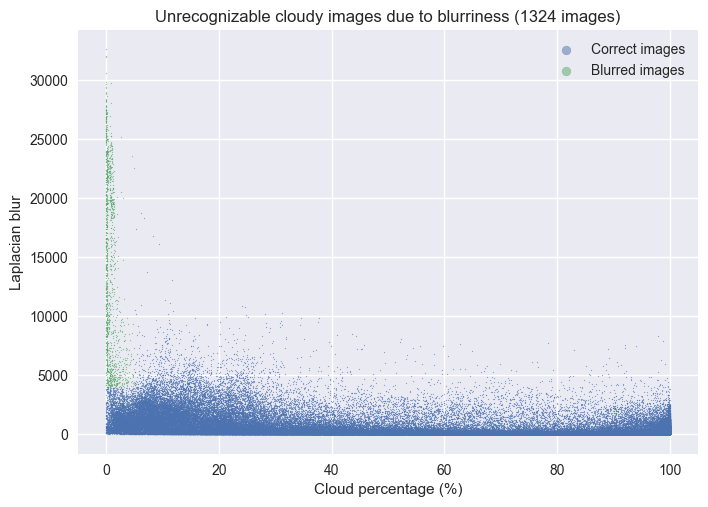

In [27]:
fig, ax = plt.subplots(1,1)
plt.style.use("seaborn-v0_8")
filter = (cloudy['cloud_percentage'] < 0.05) & (cloudy['3_laplacian_blur'] > 4000)
ok = cloudy[~filter]
bad = cloudy[filter]
ax.scatter(ok['cloud_percentage'] * 100, ok['3_laplacian_blur'], s=0.4, alpha=0.5, label="Correct images")
ax.scatter(bad['cloud_percentage'] * 100, bad['3_laplacian_blur'], s=0.4, alpha=0.5, label="Blurred images")
ax.set_xlabel("Cloud percentage (%)")
ax.set_ylabel("Laplacian blur")
plt.legend(markerscale=10,)
plt.title("Unrecognizable cloudy images due to blurriness ({} images)".format(len(bad)))
fig.savefig(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\docs\imgs\eda\cloudy-images-blurred")

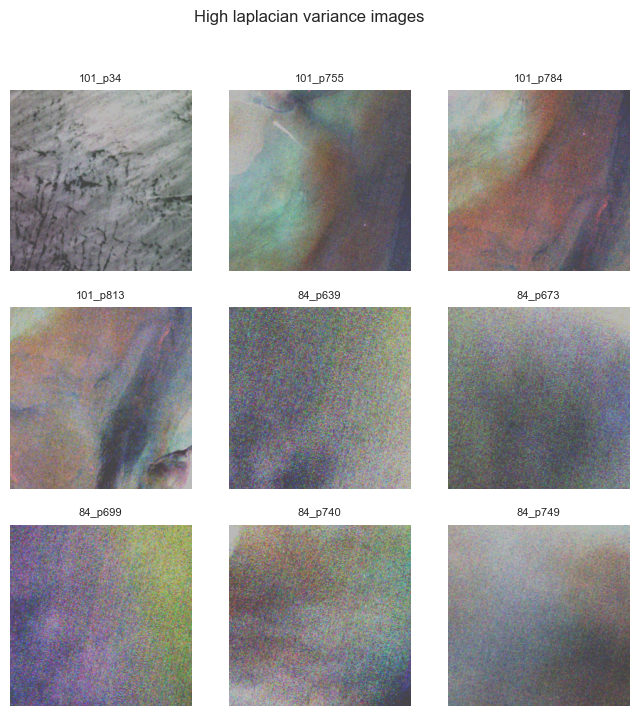

In [15]:
def scaled(x):
    min_val, max_val = np.percentile(x, (2, 98))

    # Scale the pixel values to the range of 0-255
    return np.interp(x, (min_val, max_val), (0.1, 255)).astype(np.uint8)


def sigmoid(x):
    return 255 / (1 + np.exp(-2 * (scaled(x) / 255 - 0.5)))


def get_tci(img):
    r = sigmoid(img.read(4))
    g = sigmoid(img.read(3))
    b = sigmoid(img.read(2))
    rgb = np.stack([r, g, b])
    rgb = (rgb.transpose(1, 2, 0)).astype(np.uint8)
    return rgb

BAD_FOLDER_S2 = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\bad_blur"

fig, axs = plt.subplots(3,3, figsize=(8, 8))
for img_path, ax in zip(Path(BAD_FOLDER_S2).iterdir(), axs.reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    title = img_path.name.split('_')[-2:]
    title = title[0] + "_" + title[1][:-4]
    ax.set_title(title + "", fontsize=8)
fig.suptitle("High laplacian variance images")
fig.savefig(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\docs\imgs\eda\high-blur.png")

In [16]:
INPUT_FOLDER = "/data/docker/volumes/laclasse/SEN12MS-CR"

def add_path(df, type):
    df_ = df.reset_index()
    df[f'path_{type}'] = np.array(df_.apply(lambda x: INPUT_FOLDER + "/" +  type + "/" + "{}_{}_{}".format(x['roi'], x['season'], type) + "/" +  "{}_{}".format(type, x['scene']) + "/" +  "{}_{}_{}_{}_p{}.tif".format(x['roi'], x['season'], type, x['scene'], x['patch']), axis=1))
    return df

add_path(df, 's2_cloudy')
add_path(df, 's2')
add_path(df, 's1')

0_traditional_contrast_cloudless  \
scene season roi      patch                                     
100   spring ROIs1158 570                            0.498104   
                      576                            0.571947   
                      126                            0.372613   
                      61                             0.417818   
                      171                            0.584021   
...                                                       ...   
94    winter ROIs2017 613                            0.515355   
                      156                            0.582108   
                      795                            0.550887   
                      506                            0.539966   
                      122                            0.625596   

                             0_michelson_contrast_cloudless  \
scene season roi      patch                                   
100   spring ROIs1158 570                           0.76378   
                      576                           0.76378   
                      126                           0.76378   
                      61                            0.76378   
                      171                           0.76378   
...                                                     ...   
94    winter ROIs2017 613                           0.76378   
                      156                           0.76378   
                      795                           0.76378   
                      506                           0.76378   
                      122                           0.76378   

                             0_rms_contrast_cloudless  \
scene season roi      patch                             
100   spring ROIs1158 570                   54.406554   
                      576                   41.611344   
                      126                   44.298147   
                      61                    47.221549   
                      171                   43.527666   
...                                               ...   
94    winter ROIs2017 613                   47.648651   
                      156                   43.217397   
                      795                   45.817630   
                      506                   47.444964   
                      122                   44.508021   

                             0_laplacian_blur_cloudless  0_mean_cloudless  \
scene season roi      patch                                                 
100   spring ROIs1158 570                    410.756286        109.227219   
                      576                    198.521522         72.753830   
                      126                    306.216670        118.885086   
                      61                     420.318099        113.019501   
                      171                    236.622405         74.530991   
...                                                 ...               ...   
94    winter ROIs2017 613                    396.573545         92.457993   
                      156                    327.786316         74.242981   
                      795                    396.757792         83.170593   
                      506                    441.997099         87.866531   
                      122                    298.513717         71.144974   

                             0_median_cloudless  0_p25_cloudless  \
scene season roi      patch                                        
100   spring ROIs1158 570                 103.0             61.0   
                      576                  59.0             47.0   
                      126                 127.0             85.0   
                      61                  111.0             79.0   
                      171                  61.0             43.0   
...                                         ...              ...   
94    winter ROIs2017 613                  82.0             54.0   
       

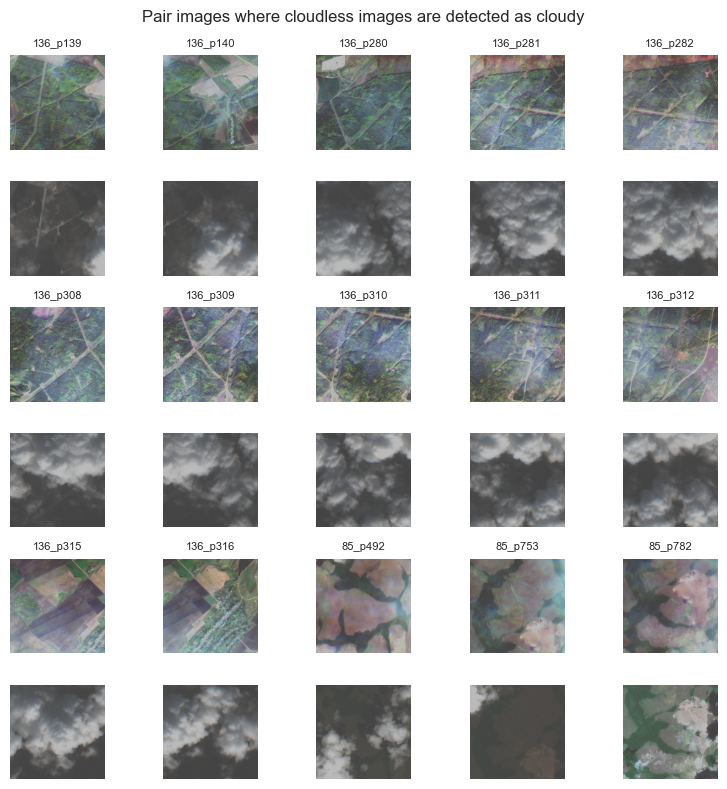

In [17]:
HIGH_CP_FOLDER_S2 = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\high_cp\s2"
HIGH_CP_FOLDER_S2_CLOUDY = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\high_cp\s2_cloudy"

fig, axs = plt.subplots(6,5, figsize=(8, 8))
for img_path, ax in zip(Path(HIGH_CP_FOLDER_S2).iterdir(), axs[[0, 2, 4], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    title = img_path.name.split('_')[-2:]
    title = title[0] + "_" + title[1][:-4]
    ax.set_title(title + "", fontsize=8)
for img_path, ax in zip(Path(HIGH_CP_FOLDER_S2_CLOUDY).iterdir(), axs[[1, 3, 5], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle("Pair images where cloudless images are detected as cloudy")
plt.tight_layout()
fig.savefig(r'C:\Users\oriol.alas\PROJECTS\LACLASSE\docs\imgs\eda\cloudless-but-cloudy.png')

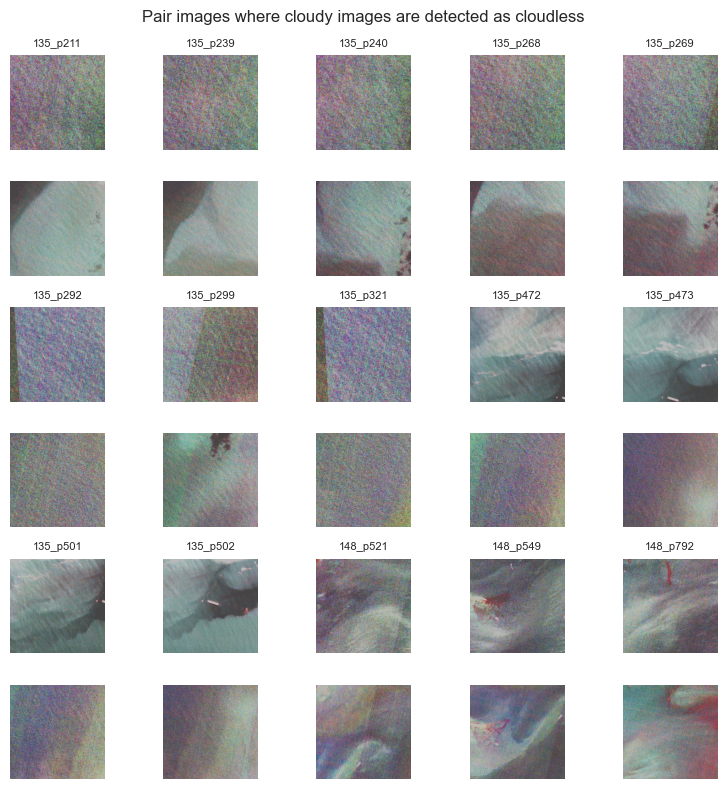

In [18]:
LOW_CP_FOLDER_S2 = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\low_cp\s2"
LOW_CP_FOLDER_S2_CLOUDY = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\low_cp\s2_cloudy"

fig, axs = plt.subplots(6,5, figsize=(8, 8))
for img_path, ax in zip(Path(LOW_CP_FOLDER_S2).iterdir(), axs[[0, 2, 4], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    title = img_path.name.split('_')[-2:]
    title = title[0] + "_" + title[1][:-4]
    ax.set_title(title, fontsize=8)
for img_path, ax in zip(Path(LOW_CP_FOLDER_S2_CLOUDY).iterdir(), axs[[1, 3, 5], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle("Pair images where cloudy images are detected as cloudless")
plt.tight_layout()
fig.savefig(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\docs\imgs\eda\cloudly-but-cloudless.png")

In [9]:
def get_attrs(df):
    for i, attr in enumerate(['roi', 'season', 'scene', 'patch']):
        df[attr] = df['tif'].apply(lambda x: x.split('_')[i])
    df['patch'] = df['patch'].apply(lambda x: int(x.split('.')[0][1:]))
    return df.set_index(['scene', 'season', 'roi', 'patch'])

split_df = pd.read_csv(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\streamlit\data\train_val_test_patches.csv")
split_df = get_attrs(split_df)

In [10]:
finished_df = split_df.join(df, how='right')
train = finished_df[(finished_df['type'] == 1)]
train

type  s1  s2_cloudFree  s2_cloudy  \
scene season roi      patch                                      
100   spring ROIs1158 570     1.0  s1  s2_cloudFree  s2_cloudy   
                      576     1.0  s1  s2_cloudFree  s2_cloudy   
                      126     1.0  s1  s2_cloudFree  s2_cloudy   
                      61      1.0  s1  s2_cloudFree  s2_cloudy   
                      171     1.0  s1  s2_cloudFree  s2_cloudy   
...                           ...  ..           ...        ...   
94    winter ROIs2017 613     1.0  s1  s2_cloudFree  s2_cloudy   
                      156     1.0  s1  s2_cloudFree  s2_cloudy   
                      795     1.0  s1  s2_cloudFree  s2_cloudy   
                      506     1.0  s1  s2_cloudFree  s2_cloudy   
                      122     1.0  s1  s2_cloudFree  s2_cloudy   

                                                      tif  \
scene season roi      patch                                 
100   spring ROIs1158 570    ROIs1158_spring_100_p570.tif   
                      576    ROIs1158_spring_100_p576.tif   
                      126    ROIs1158_spring_100_p126.tif   
                      61      ROIs1158_spring_100_p61.tif   
                      171    ROIs1158_spring_100_p171.tif   
...                                                   ...   
94    winter ROIs2017 613     ROIs2017_winter_94_p613.tif   
                      156     ROIs2017_winter_94_p156.tif   
                      795     ROIs2017_winter_94_p795.tif   
                      506     ROIs2017_winter_94_p506.tif   
                      122     ROIs2017_winter_94_p122.tif   

                             0_traditional_contrast_cloudless  \
scene season roi      patch                                     
100   spring ROIs1158 570                            0.498104   
                      576                            0.571947   
                      126                            0.372613   
                      61                             0.417818   
                      171                            0.584021   
...                                                       ...   
94    winter ROIs2017 613                            0.515355   
                      156                            0.582108   
                      795                            0.550887   
                      506                            0.539966   
                      122                            0.625596   

                             0_michelson_contrast_cloudless  \
scene season roi      patch                                   
100   spring ROIs1158 570                           0.76378   
                      576                           0.76378   
                      126                           0.76378   
                      61                            0.76378   
                      171                           0.76378   
...                                                     ...   
94    winter ROIs2017 613                           0.76378   
                      156                           0.76378   
                      795                           0.76378   
                      506                           0.76378   
                      122                           0.76378   

                             0_rms_contrast_cloudless  \
scene season roi      patch                             
100   spring ROIs1158 570                   54.406554   
                      576                   41.611344   
                      126                   44.298147   
                      61                    47.221549   
                      171                   43.527666   
...                                               ...   
94    winter ROIs2017 613                   47.648651   
                      156                   43.217397   
                      795                   45.817630   
                      506                   47.444964   
                      122 

In [11]:
train = train.drop(("146", "summer", "ROIs1868", 202))

In [12]:
a = finished_df[finished_df['type'].isna()].reset_index()
display(a['scene'].value_counts())
display(a['scene'].value_counts().sum())

scene
39     772
100    725
26     720
136    708
101    648
102    508
Name: count, dtype: int64

4081

In [13]:
val = finished_df[(finished_df['type'] == 2)]
test = finished_df[(finished_df['type'] == 3)]

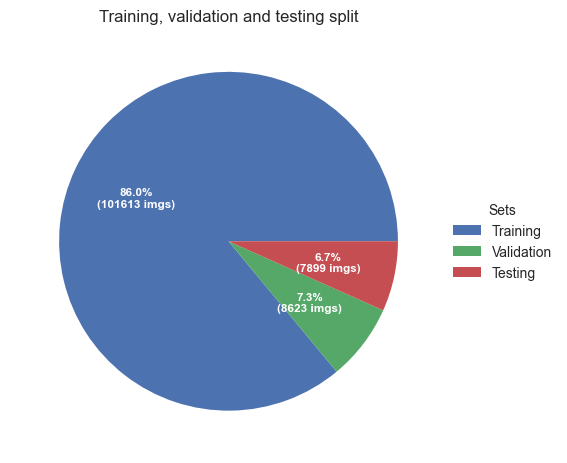

In [14]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} imgs)"

fig, ax = plt.subplots(1,1)
data = [train.shape[0], val.shape[0], test.shape[0]]
labels = ["Training", "Validation", "Testing"]
wedges, texts, autotexts = plt.pie(data, labels=labels, autopct=lambda pct: func(pct,data), textprops=dict(color="w"))
ax.legend(wedges, labels,
          title="Sets",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8.5, weight="bold")
ax.set_title("Training, validation and testing split")
fig.savefig("imgs/doc/cr-split-sets.png")

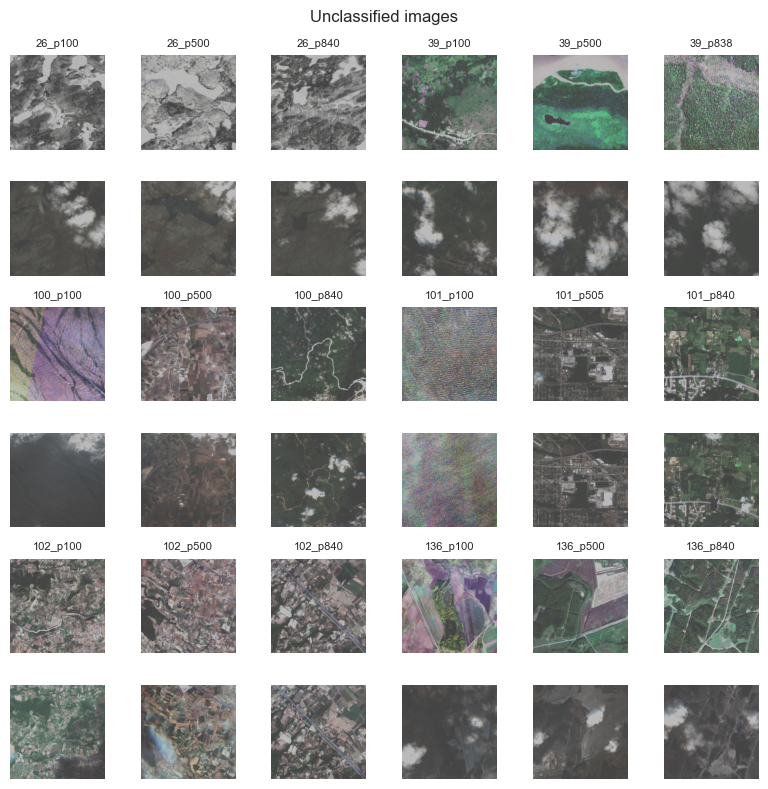

In [20]:
UNTAGGED_FOLDER_S2 = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\untagged\s2"
UNTAGGED_FOLDER_S2_CLOUDY = r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\cr\untagged\s2_cloudy"


fig, axs = plt.subplots(6,6, figsize=(8, 8))
for img_path, ax in zip(Path(UNTAGGED_FOLDER_S2).iterdir(), axs[[0, 2, 4], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    title = img_path.name.split('_')[-2:]
    title = title[0] + "_" + title[1][:-4]
    ax.set_title(title, fontsize=8)
for img_path, ax in zip(Path(UNTAGGED_FOLDER_S2_CLOUDY).iterdir(), axs[[1, 3, 5], :].reshape(-1)):
    img = get_tci(rio.open(img_path))
    ax.imshow(img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle("Unclassified images")
plt.tight_layout()
fig.savefig(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\docs\imgs\eda\unclassified.png")

In [16]:
paths = ['path_s1', 'path_s2', 'path_s2_cloudy']
rename_cols = {
    'path_s2': 'cloudless_img_path',
    'path_s1': 'sar_img_path',
    'path_s2_cloudy': 'cloudly_img_path',
}
def turn(df):
    df_ = df.copy()
    for path in paths:
        df_[path] = df_[path].apply(lambda x: '/'.join(x.split('/')[6:])).copy()
    df_ = df_[paths].rename(columns=rename_cols)
    df_['continent'] = None
    return df_
train = turn(train)

In [17]:
train.to_pickle('data/input/train.pkl')

In [18]:
turn(val).to_pickle("data/input/val.pkl")

In [19]:
turn(test).to_pickle("data/input/test.pkl")

In [20]:
import pandas as pd

df = pd.read_pickle('data/input/train.pkl')
df.iloc[0]

sar_img_path          s1/ROIs1158_spring_s1/s1_100/ROIs1158_spring_s...
cloudless_img_path    s2/ROIs1158_spring_s2/s2_100/ROIs1158_spring_s...
cloudly_img_path      s2_cloudy/ROIs1158_spring_s2_cloudy/s2_cloudy_...
continent                                                          None
Name: (100, spring, ROIs1158, 570), dtype: object

In [21]:
[*turn(test).iloc[0].name, turn(test).iloc[0].continent]

['106', 'spring', 'ROIs1158', 104, None]